In [2]:
#importation
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from itertools import islice
import sys
import os

In [28]:
#loading data
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_path = os.path.join(parent_dir, "data", "AdSmartABdata.csv")                             
db = pd.read_csv(data_path)
db.head()

auction_id experiment        date  hour  \
0  0008ef63-77a7-448b-bd1e-075f42c55e39    exposed  2020-07-10     8   
1  000eabc5-17ce-4137-8efe-44734d914446    exposed  2020-07-07    10   
2  0016d14a-ae18-4a02-a204-6ba53b52f2ed    exposed  2020-07-05     2   
3  00187412-2932-4542-a8ef-3633901c98d9    control  2020-07-03    15   
4  001a7785-d3fe-4e11-a344-c8735acacc2c    control  2020-07-03    15   

          device_make  platform_os                browser  yes  no  
0  Generic Smartphone            6          Chrome Mobile    0   0  
1  Generic Smartphone            6          Chrome Mobile    0   0  
2               E5823            6  Chrome Mobile WebView    0   1  
3   Samsung SM-A705FN            6               Facebook    0   0  
4  Generic Smartphone            6          Chrome Mobile    0   0

In [29]:
#number of data points
print(f"There are {db.shape[0]} rows and {db.shape[1]} columns")

There are 8077 rows and 9 columns


In [37]:
if(db.nunique()['auction_id']==8077):
    print("no repeated impression id")

no repeated impression id


In [30]:
#is there null?
if(db.isnull().sum().sum()==0):
    print("no null values")


no null values


* if both section of yes and no is 0, then the users didn't answered
* let us filter out those who answered either yes or no

In [113]:
answered = db.query('yes==1 or no==1')
print(f"There are {answered.shape[0]} rows and {answered.shape[1]} columns")

There are 1243 rows and 9 columns


* plots of people who answered yes or no

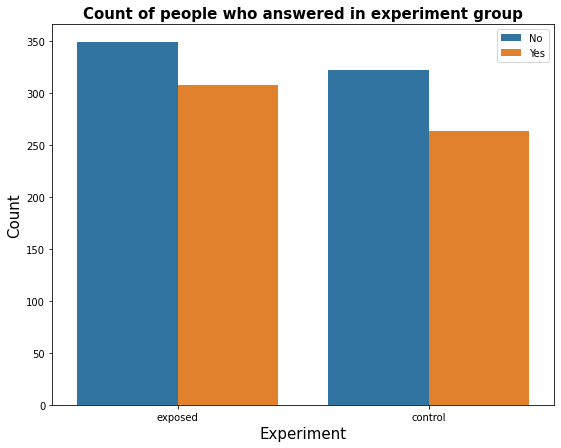

In [123]:
plt.figure(figsize=(9,7))
ax=sb.countplot(x ='experiment', hue='yes', data = answered) 

ax.set_xlabel('Experiment', fontsize=15)
ax.set_ylabel('Count' , fontsize=15)
ax.set_title('Count of people who answered in experiment group', fontsize=15, fontweight='bold')
plt.legend( ['No', 'Yes'])

* PLOT OF USED BROWSERS

Text(0.5, 1.0, 'Used Browsers')

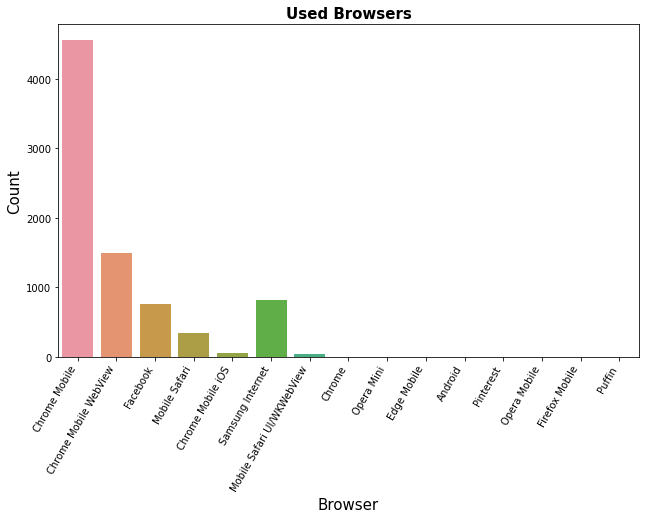

In [127]:
plt.figure(figsize=(9,7))
ax= sb.countplot(x ='browser', data = db) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
ax.set_xlabel('Browser', fontsize=15)
ax.set_ylabel('Count' , fontsize=15)
ax.set_title('Used Browsers', fontsize=15, fontweight='bold')